<a href="https://colab.research.google.com/github/Diya1s/deep-learning/blob/main/pr2_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


# Step 1: Load dataset

data = pd.read_csv("diabetes.csv")

# Use one feature (e.g., "BMI") for simplicity
X = data[["BMI"]].values
y = data["Outcome"].values  # or change to another target column if present

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)


In [2]:
# Step 2: Train and plot polynomial regression

def plot_polynomial_fit(degree):
    poly = PolynomialFeatures(degree=degree)
    X_train_poly = poly.fit_transform(X_train)
    X_test_poly = poly.transform(X_test)

    model = LinearRegression()
    model.fit(X_train_poly, y_train)

    # Predictions
    y_train_pred = model.predict(X_train_poly)
    y_test_pred = model.predict(X_test_poly)

    # Errors
    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    # Plot
    plt.scatter(X_train, y_train, color="blue", label="Train data")
    plt.scatter(X_test, y_test, color="green", label="Test data")

    X_curve = np.linspace(X.min(), X.max(), 200).reshape(-1, 1)
    y_curve = model.predict(poly.transform(X_curve))
    plt.plot(X_curve, y_curve, color="red", linewidth=2, label=f"Degree={degree}")

    plt.title(
        f"Polynomial Degree={degree}\nTrain MSE={train_error:.3f}, Test MSE={test_error:.3f}"
    )
    plt.xlabel("BMI")
    plt.ylabel("Outcome")
    plt.legend()
    plt.show()

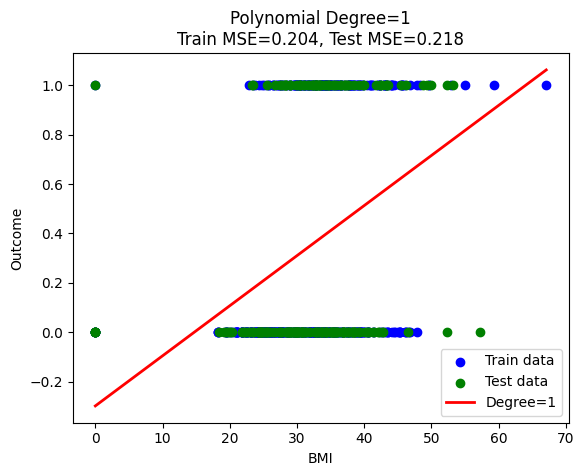

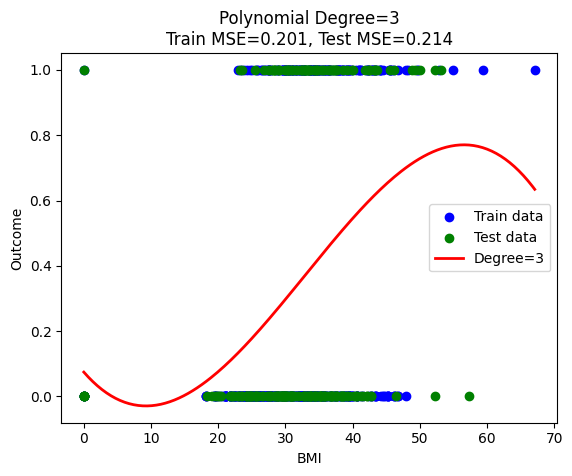

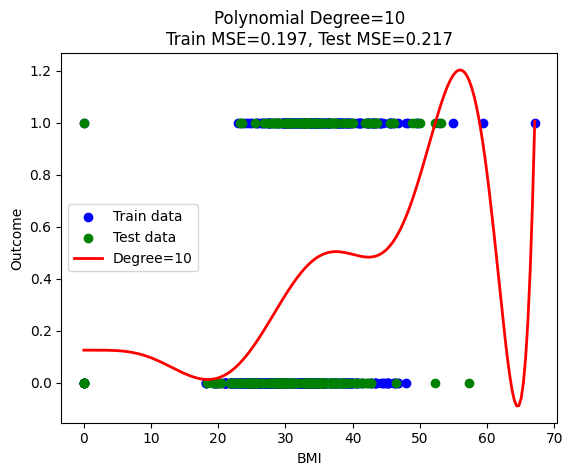

In [3]:


# -------------------------------
# Step 3: Demonstrate underfitting, good fit, and overfitting
# -------------------------------
plot_polynomial_fit(1)   # Underfitting
plot_polynomial_fit(3)   # Balanced fit
plot_polynomial_fit(10)  # Overfitting
